In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
#import datetime
from datetime import datetime
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from tqdm.notebook import tqdm
import os


start_date = "2022-01-01"
end_date = "2022-05-26"

## Defense
RTX - Raytheon Technologies Corp.\
LMT - Lockheed Martin Corp.\
BA  - Boeing Co.\
NOC - Northrop Grumman Corp.\
GD - General Dynamics Corp.

## Airlines
LUV - Southwest Airlines\
DAL - Delta Air Lines\
UAL - United Airlines\
AAL - American Airlines

## Commodities
CL=F - Crude Oil June 22 Futures Contract

## Market Indexes
GSPC - S&P 500\
DJI - Dow Jones Industrial Average\
IXIC - NASDAQ Composite

https://www.ishares.com/us/products/239502/ishares-us-aerospace-defense-etf


In [2]:
defense_ticks = ["RTX", "LMT", "BA", "NOC", "GD"]
airline_ticks = ["LUV", "DAL", "UAL", "AAL"]
market_ticks = ["^GSPC", "^DJI", "^IXIC"]
market_labels = ["S&P 500", "DJIA", "NASDAQ Comp."]
commodities_ticks = ["CL=F"]
commodities_labels = ["Crude - June"]

In [3]:
def normalize_price(df):
    min_p = df.min()
    max_p = df.max()
    x = df
    y = (x - min_p) / (max_p - min_p)
    return y

def get_data(ticker_str_list, start_date = "2000-01-01", end_date = "2022-05-01"):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [normalize_price(securs["Open"]) for securs in securities]
    closes = [normalize_price(securs["Close"]) for securs in securities]
    highs = [normalize_price(securs["High"]) for securs in securities]
    lows = [normalize_price(securs["Low"]) for securs in securities]
    volumes = [normalize_price(securs["Volume"]) for securs in securities]

    return opens, closes, highs, lows, volumes

def get_single_data(ticker_str, start_date = "2000-01-01", end_date = "2022-05-01"):
    ticker = yf.Ticker(ticker_str)
    df = ticker.history(start = start_date, end = end_date)
    
    return(df)

def get_unnormed_data(ticker_str_list, start_date = "2000-01-01", end_date = "2022-05-01"):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [securs["Open"] for securs in securities]
    closes = [securs["Close"] for securs in securities]
    highs = [securs["High"] for securs in securities]
    lows = [securs["Low"] for securs in securities]
    volumes = [securs["Volume"] for securs in securities]

    return opens, closes, highs, lows, volumes

def get_mean(data):
    n = len(data[0])
    tot = data[0][0]
    for i in range(1,n):
        tot+= data[0][i]
    return tot/n

In [4]:
def get_unnormed_opens(ticker_str_list, start_date = "2000-01-01", end_date = "2022-05-01"):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [securs["Open"] for securs in securities]

    return opens

In [5]:
sap = pd.read_csv(r'cursp500v2.csv')
sap = sap.fillna(0)

In [6]:
'''
Grab all tickers from each GICS Sub-Industry and group them, along with a list of the GICS Sub-Indistry labels
'''

sub_ind_ticks = []
current_list = []
sub_ind_labels = []
for index, row in sap.iterrows():
    if row["Shared GICS Sub-Ind."] == 0:
        current_list.append(row["Symbol"])
    else:
        current_list.append(row["Symbol"])
        sub_ind_ticks.append(current_list)
        current_list = []
        sub_ind_labels.append(row["Shared GICS Sub-Ind."])

'''
Index 69 -> Aero & Defense
Index 71 -> Air Frieght & Logistics
Index 72 -> Airlines
''';

# PLOTTING SUB_INDUSTRIES

In [7]:
sub_ind_data_lists = []

for sub_ind in tqdm(sub_ind_ticks):
    sub_ind_data_lists.append(get_unnormed_opens(sub_ind, start_date=start_date, end_date=end_date))


avg_sub_ind = []
for sub_d in tqdm(sub_ind_data_lists):
    avg_sub_ind.append(get_mean(sub_d))

In [63]:
sub_ind_data_lists[71]

([Date
  2022-01-03    713.104995
  2022-01-04    707.606799
  2022-01-05    717.456077
  2022-01-06    713.320199
  2022-01-07    715.644282
                   ...    
  2022-05-19    578.110001
  2022-05-20    578.270012
  2022-05-23    583.450012
  2022-05-24    584.359985
  2022-05-25    584.379997
  Name: Open, Length: 100, dtype: float64,
  Date
  2022-01-03    134.360001
  2022-01-04    130.630005
  2022-01-05    129.990005
  2022-01-06    129.949997
  2022-01-07    129.750000
                   ...    
  2022-05-19    104.559998
  2022-05-20    104.730003
  2022-05-23    106.160004
  2022-05-24    104.949997
  2022-05-25    105.120003
  Name: Open, Length: 100, dtype: float64,
  Date
  2022-01-03    258.919562
  2022-01-04    258.770084
  2022-01-05    264.101938
  2022-01-06    261.102150
  2022-01-07    261.799785
                   ...    
  2022-05-19    201.089996
  2022-05-20    201.960007
  2022-05-23    202.190002
  2022-05-24    202.649994
  2022-05-25    202.729996
  

In [8]:
'''
INDICIES
List of Tickers for Correlations:
---------------------------------
S&P 500
"^GSPC"

Dow Jones Industrial Average
"^DJI"

NASDAQ Composite
"^IXIC"

Russel 2000
"^RUT"
''';

In [9]:
'''
COMMODITIES
List of Tickers for Correlations:
---------------------------------
June 22 Crude Oil Futures Contract
"CL=F"

June 22 Gold Futures Contact
"GC=F"

June 22 Silver Futures Contract
"SI=F"

Euro-USD 
"EURUSD=X"

US Treasury 10 Year Bond
"^TNX"

CMC Crypto 200 Index
"^CMC200"
''';

In [10]:
ctlist = ["^TNX", "CL=F", "^CMC200", "^DJI", "EURUSD=X", "GC=F", "^IXIC", "^RUT", "^GSPC", "SI=F"]
cllist = ["Bonds", "Crude", "Crypto", "DJIA", "EuroUSD", "Gold", "NASDAQ", "Russell2000", "S&P500", "Silver"]




now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
direc_string = now.strftime("%d-%m-%Y_%H-%M-%S")
os.makedirs("CorrelationCSVs/{}".format(direc_string))

for i in range(len(ctlist)):
    correlation_ticks = [ctlist[i]]
    correlation_from = cllist[i]
    corrdata = get_data(correlation_ticks, start_date=start_date, end_date=end_date)
    avg_corr = get_mean(corrdata)
    csv_title = "CorrelationCSVs/{}/{}_to_sp500_sub_industries_correlations.csv".format(direc_string, correlation_from)

    


    with open(csv_title, 'w') as f:
        writer = csv.writer(f)
        writer.writerow([correlation_from,"","", "Data Pulled @", dt_string,"", "Price Date Range:", start_date, end_date])
        for j in range(len(avg_sub_ind)):
            writer.writerow([sub_ind_labels[j],avg_corr.corr(avg_sub_ind[j])])

In [16]:
print(sub_ind_ticks[69],"\n", sub_ind_ticks[71],"\n", sub_ind_ticks[72])

['BA', 'GD', 'HWM', 'HII', 'LHX', 'LMT', 'NOC', 'RTX', 'TDY', 'TXT', 'TDG'] 
 ['CHRW', 'EXPD', 'FDX', 'UPS'] 
 ['ALK', 'AAL', 'DAL', 'LUV', 'UAL']


In [58]:
avg_sub_ind[71]

Date
2022-01-03    178.276249
2022-01-04    176.901700
2022-01-05    179.364019
2022-01-06    178.330050
2022-01-07    178.911071
                 ...    
2022-05-19    144.527500
2022-05-20    144.567503
2022-05-23    145.862503
2022-05-24    146.089996
2022-05-25    146.094999
Name: Open, Length: 100, dtype: float64

In [59]:
avg_corr.corr(avg_sub_ind[71])

-0.07316866345310202

In [60]:
corr_nums = []
for i in range(len(avg_sub_ind[71])):
    n = len(avg_sub_ind) - i
    corr_nums.append(avg_corr[0:n].corr(avg_sub_ind[71][0:n]))

In [61]:
print(corr_nums)

[-0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.07316866345310202, -0.09376499491388998, -0.11342848097628525, -0.1373212616621375, -0.1676721883033692, -0.20403534192280368, -0.2161764743707106, -0.23095828067896257, -0.2591891394971536, -0.2974611778415243, -0.33392121844621636, -0.36684443748423695, -0.39107865105651574, -0.4228696076261181, -0.45361192277095674, -0.46810601871770063, -0.5025415134375141, -0.5440261817395642, -0.5868615063341972, -0.607391753720448, -0.6307096539682574, -0.66328700851999, -0.6868472535594765, -0.

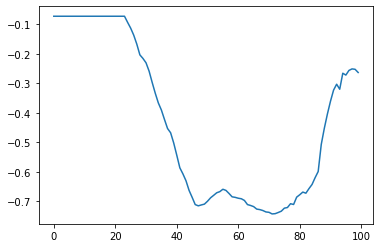

In [62]:
plt.plot(corr_nums)